<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_3/Esperienza_3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

retta_fit_xba(x, b,a)

regrlin_pear_errpost_xys(input_x, input_y, input_sigma)

chi_quadro(y_vec, x_vec, sigma_vec, y_ref, stringa_ytitle, stringa_xtitle, stringa_titolo, bolean_parameter)

intersezione_2rette(int1, err_int1, pend1, err_pend1, cov1, int2, err_int2, pend2, err_pend2, cov2)

#Analisi

Verifica qualitativa della costruzione di un circuito derivatore

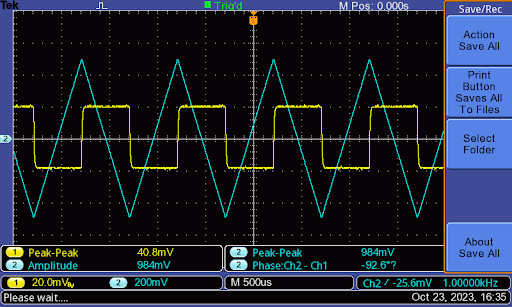

capacita metric 0.650 scala 1000pf 0.68pF

R1 8.1667 scala 10.000k

Rf 14.972 scala 100.00k

In [6]:
#@title frequenza di taglio teorica
R1 = 8.1667 #kohm
c1 = 0.65 #nF
Rf = 14.972 #kohm

err_R1 = math.sqrt(1/3)* math.sqrt( (R1*0.07/100)**2 + (0.0008)**2 ) #kohm                          #ipotesi uniforme
err_Rf = math.sqrt(1/3)* math.sqrt( (Rf*0.07/100)**2 + (0.008)**2 ) #kohm                           #ipotesi uniforme
err_c1 = math.sqrt(1/3)* math.sqrt( (c1*2.5/100)**2 + (0.015)**2 ) #nf                              #ipotesi uniforme

#frequenza di taglio teorica con la formula classica
f_t = 1/ (2*math.pi*R1*(10**3)*c1*(10**-9))
err_ft = (1/(2*math.pi))*f_t*math.sqrt( ( err_R1/R1 )**2 + ( err_c1/c1 )**2 )                       #propagazione di una ipotesi uniforme

print("frequenza di taglio [Hz] \n", f_t, "\n")
print("err ft [Hz] \n", err_ft, "\n")
print(err_ft*100/f_t, "  (errore relativo %)")

print("\n tau \n", R1*(10**3)*c1*(10**-9))

frequenza di taglio [Hz] 
 29981.970514763107 

err ft [Hz] 
 93.75235864705112 

0.3126957869593245   (errore relativo %)

 tau 
 5.308355000000001e-06


In [7]:
frequenza_khz = [0.1, 0.215, 0.464, 1, 2.15, 4.64, 10, 21.5, 46.4, 100, 215, 464, 1000, 18.5, 18.8, 19.1, 19.4, 18.2]
v_in = [1.03, 1.04, 1.01, 1.01, 1.01, 1.01, 0.992, 1, 1, 1.03, 1, 1.02, 1.02, 1, 1, 1, 1, 1]
v_out = [0.02, 0.02, 0.02, 0.061, 0.132, 0.276, 0.564, 1.06, 1.56, 1.8, 1.88, 1.88, 1.52, 0.944, 0.952, 0.96, 0.976, 0.928 ]
v_in_div = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
v_out_div = [0.2, 0.5, 0.5, 0.02, 0.02, 0.05, 0.1, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0.2]

In [8]:
#@title elaborazione dei dati
A = []
log_A = []
err_A = []
err_log_A = []
frequenza_hz = []

for i in range(len(v_in)):
  dummy=0
  dummy = v_out[i]/v_in[i]
  A.append(dummy)

for i in A:
  dummy = 0
  dummy =  20*math.log10(i)
  log_A.append(dummy)

for i in frequenza_khz:
  dummy = 0
  dummy = i*1000
  frequenza_hz.append(dummy)

#calcolo degli errori
for i in range(len(v_in)):
  dummy_err_vout = math.sqrt(1/3)* math.sqrt( ((1/10)*v_out_div[i])**2 + ((3/100)*v_out[i])**2)     #ipotesi uniforme
  #print(dummy_err_vout, "err_vout" ,"")
  dummy_err_vin = math.sqrt(1/3)* math.sqrt( ((1/10)*v_in_div[i])**2 + ((3/100)*v_in[i])**2 )       #ipotesi uniforme
  #print(dummy_err_vin, "err_vin" ,"")
  dummy_g = v_out[i]/v_in[i]
  #print(dummy_g, "g" ,"")
  dummy_err_g = dummy_g * math.sqrt( (dummy_err_vout/v_out[i])**2 + (dummy_err_vin/v_in[i])**2 )    #propagazione dell'uniforme
  err_A.append(dummy_err_g)
  #print(dummy_err_g, "err_g" ,"")
  dummy_err_A = 20*(dummy_err_g / (dummy_g*math.log(10)))                                           #propagazione dell'uniforme
  err_log_A.append(dummy_err_A)
  #print(dummy_err_A)
  #print("-----------------------------")

print("A \n", A)
print("\n err_A \n", err_A)
print("\n log_A \n", log_A)
print("\n err_log_A \n", err_log_A)
print("\n freq hz \n", frequenza_hz)

A 
 [0.019417475728155338, 0.019230769230769232, 0.019801980198019802, 0.060396039603960394, 0.1306930693069307, 0.2732673267326733, 0.5685483870967741, 1.06, 1.56, 1.7475728155339805, 1.88, 1.8431372549019607, 1.4901960784313726, 0.944, 0.952, 0.96, 0.976, 0.928]

 err_A 
 [0.011222881249716947, 0.027762042322136634, 0.02858670841217408, 0.001993099280189322, 0.0037132220448596147, 0.007920520060177471, 0.016480870455257056, 0.030940372762244914, 0.05116613463349887, 0.05478804105824911, 0.0585254360655832, 0.05722440200744134, 0.04917294234272089, 0.02805054485507664, 0.02824811970143618, 0.028445972181195236, 0.02884248717892871, 0.027656251854990523]

 log_A 
 [-34.23614458082382, -34.32006687269598, -34.06582756237323, -24.37983077543751, -17.674948851535856, -11.268245834348496, -4.904651363416728, 0.5061173052954052, 3.862491967089232, 4.8487056079626765, 5.483156985273596, 5.311153550035246, 3.4648683236571, -0.500560114038621, -0.4272610323105135, -0.35457533920863205, -0.2110

In [13]:
#@title calcolo delle due rette di fit

frequenza_hz_2p = frequenza_hz[2:7]
A_2p = log_A[2:7]
err_A_2p = err_log_A[2:7]

frequenza_hz_1p = frequenza_hz[-9:-6]
A_1p = log_A[-9:-6]
err_A_1p = err_log_A[-9:-6]




def retta_orizzontale(x, a):
  return a + (0*x)

print("-------------------------------------------------------------")
parametri_2p, matrixcov_2p = curve_fit(retta_fit_xba, np.log10( frequenza_hz_2p ), A_2p, sigma=err_A_2p)
print("parametri\n", parametri_2p)
print("err\n", (matrixcov_2p))
print("-------------------------------------------------------------")
parametri_1p, matrixcov_1p = curve_fit(retta_orizzontale, np.log10( frequenza_hz_1p ), A_1p, sigma=err_A_1p)
print("parametri\n", parametri_1p)
print("err\n", math.sqrt(matrixcov_1p))

#calcoliamo il punto di intersezione
#intersezione_2rette(int1, err_int1, pend1, err_pend1, cov1, int2, err_int2, pend2, err_pend2, cov2)
intersezione_2rette(-82.51253259, math.sqrt(0.33075274),  19.41966099 , math.sqrt(0.02630083 ), -0.09278403  , 5.21622496,  0.18890352191464396, 0, 0, 0)

intersezione_2rette(5.21622496, 0.18890352191464396, 0, 0, 0, -82.51253259, math.sqrt(0.33075274),  19.41966099 , math.sqrt(0.02630083 ), -0.09278403)


-------------------------------------------------------------
parametri
 [ 19.41966099 -82.51253259]
err
 [[ 0.02630083 -0.09278403]
 [-0.09278403  0.33075274]]
-------------------------------------------------------------
parametri
 [5.21622496]
err
 0.18890352191464396
---------------------------------------------
x intersezione
4.517522607381006
incertezza
0.7280759348832136
---------------------------------------------
---------------------------------------------
x intersezione
4.517522607381006
incertezza
0.09651195361465774
---------------------------------------------


la pendenza di un valore attorno a 20 decibel per decade ci piace

In [ ]:
#@title debug punti
plt.figure(figsize=(10,5))

plt.plot(frequenza_hz_1p, A_1p, linestyle="", marker="x")
plt.plot(frequenza_hz_2p, A_2p, linestyle="", marker="x")

plt.xscale("log", base=10)
plt.grid()

la regressione è stata fatta con x in scala logaritmica, la in intercetta è l'esponente di 10^....

l'interpretazione dell'incertezza è più complicata

In [14]:
print(10**(4.517522606866064), "  frequenza [Hz]")
print(10**(0.7280759348928764))
print(10**(0.09651195361465774))

32924.75916181246   frequenza [Hz]
5.346578343038794
1.2488548178657535


In [15]:
%%shell
curl -l https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_3/simulazione/3%20-%20derivatore > "3 - derivatore"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4022  100  4022    0     0   6172      0 --:--:-- --:--:-- --:--:--  6178


In [16]:
#@title dati simulazione

f_spice, a_spice, fase_spice = np.loadtxt( "3 - derivatore", skiprows=1, unpack=True)

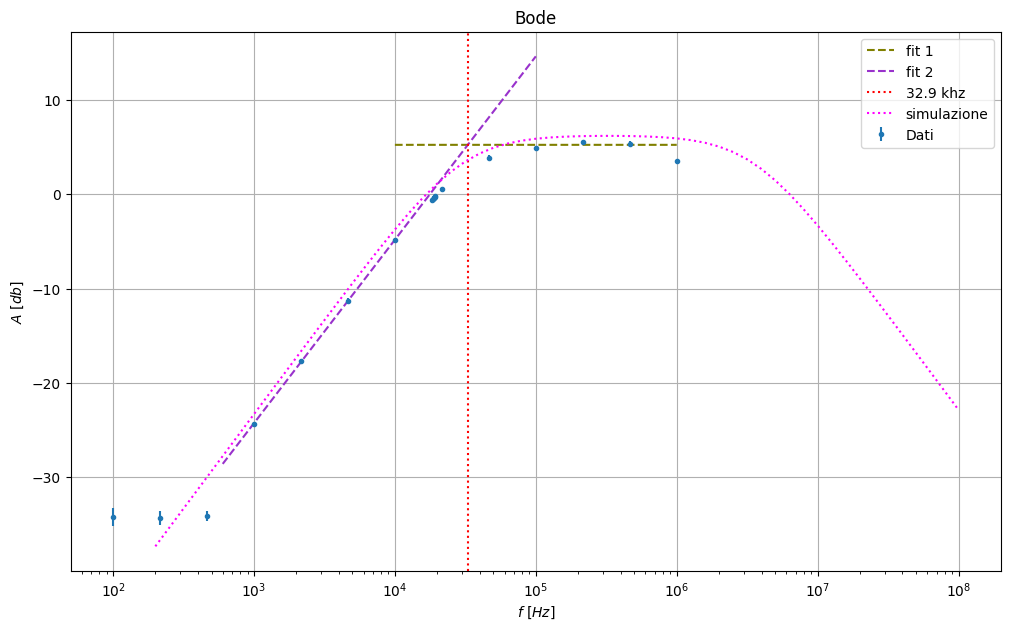

In [28]:
#@title grafico finale

err_log_A =  [0.9553392552986, 0.718493135793157, 0.55853186104244, 0.2866386686768136, 0.24678153978873935, 0.25175627083322305, 0.2517833576920223, 0.25353270110703086, 0.2848867939954797, 0.27231075803403304, 0.2703965312155781, 0.2696732644945323, 0.28661379300997697, 0.2580973907826152, 0.2577311451780728, 0.2573735156388854, 0.25668305381504153, 0.2588568441971757]
#i primi tre punti sono stati "ricalcolati"

#ricalcolo altezza simulazione
a_spice_t = []
for i in a_spice:
  dummy = 0
  dummy = i - 13
  a_spice_t.append(dummy)



plt.figure(figsize=(12,7))
plt.errorbar(frequenza_hz, log_A, linestyle="", marker=".", yerr=err_log_A, label="Dati")
plt.xscale("log", base=10)
plt.title("Bode")
plt.xlabel("$f \\ [Hz]$")
plt.ylabel("$A \\ [db]$")

plt.plot( np.linspace(10000, 1000000, 1000000), retta_orizzontale( np.linspace(10000, 1000000, 1000000), 5.21622496 ), marker="", linestyle="--", color="olive", label="fit 1"  ) #dritta x,a
plt.plot( ( np.linspace(600, 100000, 100000) ), ( retta_fit_xba( np.log10( np.linspace(600, 100000, 100000) ), 19.41966099  , -82.51253259 ) ), marker="", linestyle="--", color="darkorchid", label="fit 2" ) #obliqua
plt.axvline(x=32924.75916181246, color='red', linestyle=':', label="32.9 khz")
plt.plot( f_spice[3:], a_spice_t[3:], marker="", linestyle=":", label="simulazione" , color="magenta")

plt.grid()
plt.legend()

non abbiamo dati per determinare la frequena di taglio superiore

calcoliamo la frequenza di taglio per la sola simulazione

In [40]:
#ricalcolo altezza simulazione
a_spice_t = []
for i in a_spice:
  dummy = 0
  dummy = i - 13
  a_spice_t.append(dummy)

frequenza_hz_2p = f_spice[3:19]
A_2p = a_spice_t[3:19]

frequenza_hz_1p = f_spice[31:39]
A_1p = a_spice_t[31:39]


def retta_orizzontale(x, a):
  return a + (0*x)


print("-------------------------------------------------------------")
parametri_2p, matrixcov_2p = curve_fit(retta_fit_xba, np.log10( frequenza_hz_2p ), A_2p)
print("parametri\n", parametri_2p)
print("err\n", (matrixcov_2p))
print("-------------------------------------------------------------")
parametri_1p, matrixcov_1p = curve_fit(retta_orizzontale, np.log10( frequenza_hz_1p ), A_1p)
print("parametri\n", parametri_1p)
print("err\n", math.sqrt(matrixcov_1p))

#calcoliamo il punto di intersezione
#intersezione_2rette(int1, err_int1, pend1, err_pend1, cov1, int2, err_int2, pend2, err_pend2, cov2)

intersezione_2rette(-83.05819526, math.sqrt(0.00337267), 19.91242157 , math.sqrt(0.00035446 ), -0.0010811 , 6.11355499, 0.02040291667472134, 0, 0, 0)
intersezione_2rette(6.11355499 , 0.02040291667472134, 0, 0, 0, -83.05819526, math.sqrt(0.00337267), 19.91242157  , math.sqrt(0.00035446 ), -0.0010811 )

-------------------------------------------------------------
parametri
 [ 19.91242157 -83.05819526]
err
 [[ 0.00035446 -0.0010811 ]
 [-0.0010811   0.00337267]]
-------------------------------------------------------------
parametri
 [6.11355499]
err
 0.020402916558577053
---------------------------------------------
x intersezione
4.478197186440946
incertezza
0.08443456505257238
---------------------------------------------
---------------------------------------------
x intersezione
4.478197186440946
incertezza
0.013049654592176486
---------------------------------------------


In [44]:
print(10**(4.478197186440946))
print(10**(0.08443456505257238))

30074.4148708205
1.2146036029245206


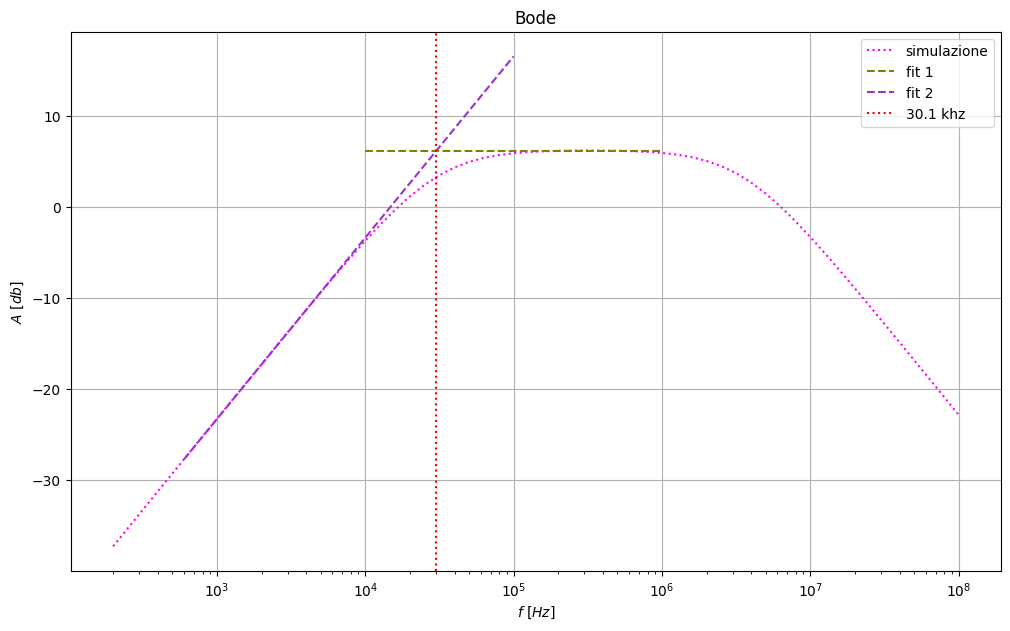

In [43]:
plt.figure(figsize=(12,7))
plt.xscale("log", base=10)
plt.title("Bode")
plt.xlabel("$f \\ [Hz]$")
plt.ylabel("$A \\ [db]$")
plt.plot( f_spice[3:], a_spice_t[3:], marker="", linestyle=":", label="simulazione" , color="magenta")

plt.plot( np.linspace(10000, 1000000, 1000000), retta_orizzontale( np.linspace(10000, 1000000, 1000000), 6.11355499 ), marker="", linestyle="--", color="olive", label="fit 1"  ) #dritta x,a
plt.plot( ( np.linspace(600, 100000, 100000) ), ( retta_fit_xba( np.log10( np.linspace(600, 100000, 100000) ), 19.91242157 ,-83.05819526 ) ), marker="", linestyle="--", color="darkorchid", label="fit 2" ) #obliqua
plt.axvline(x=30074.4148708205, color='red', linestyle=':', label="30.1 khz")

plt.grid()
plt.legend()

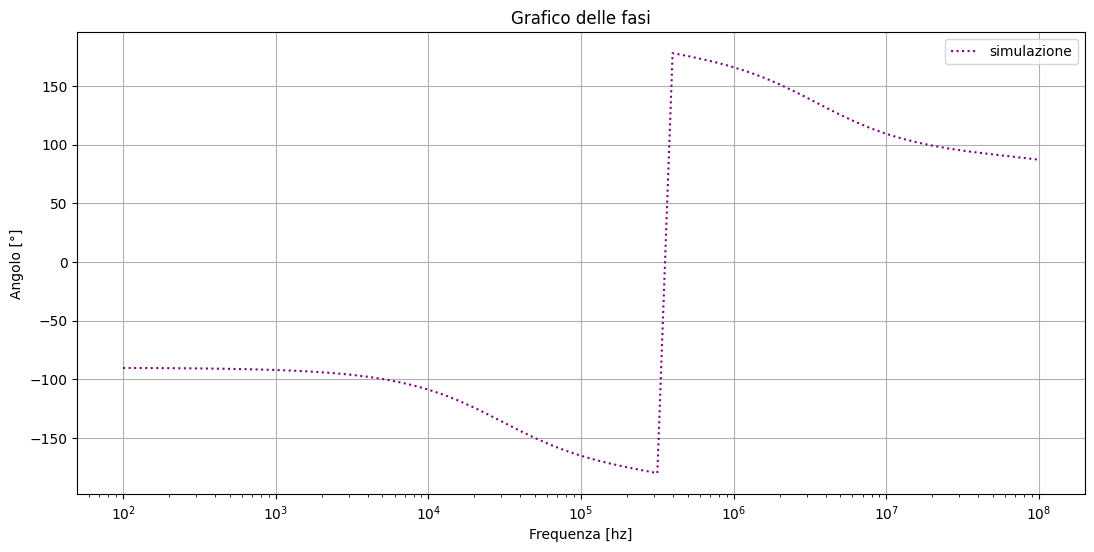

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(f_spice, fase_spice, marker="", linestyle=":", label="simulazione", color="purple")
plt.grid()
plt.xlabel("Frequenza [hz]")
plt.ylabel("Angolo [°]")
plt.title("Grafico delle fasi")
plt.xscale("log", base=10)
plt.legend()

In [46]:
#@title compatibilità tra il teorico e il bode
comp_tb = abs(29981.970514763107 - 32924.75916181246) / math.sqrt( (93.75235864705112)**2 + (5.346578343038794)**2 )
print("comp teorico - bode\n", comp_tb)
comp_ts = abs(29981.970514763107 - 30074.4148708205) / math.sqrt( (93.75235864705112)**2 + (1.2146036029245206)**2 )
print("comp teorico - simulazione\n", comp_ts)
comp_sb = abs(30074.4148708205 - 32924.75916181246) / math.sqrt( (1.2146036029245206)**2 + (5.346578343038794)**2 )
print("comp simulazione - bode\n", comp_sb)

comp teorico - bode
 31.33803724216884
comp teorico - simulazione
 0.9859655828627489
comp simulazione - bode
 519.8696212878601


bisogna verificare come ricavare in modo corretto l'incertezza per la frequenza di taglio ricavata dal grafico di bode

#Librerie

In [2]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

In [3]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

In [4]:
def chi_quadro(y_vec, x_vec, sigma_vec, y_ref, stringa_ytitle, stringa_xtitle, stringa_titolo, bolean_parameter):

  import math
  import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
  y = list(y_vec)
  x = list(x_vec)
  sigma = list(sigma_vec)
  dimensione = len(y)

#calcolo del chi quadro
  vettore_scarti_quadratici = []
  vettore_scarti = []
  for i in range(dimensione):
    dummy_2 = 0
    dummy_3 = 0
    dummy_4 = 0
    dummy_2 = y[i] - y_ref[i]
    dummy_3 = dummy_2 / sigma[i]
    dummy_4 = dummy_3**2
    vettore_scarti_quadratici.append(dummy_4)
    vettore_scarti.append(dummy_2)

  chi_quadro = sum(vettore_scarti_quadratici)
  print("chi quadro \n", chi_quadro)
  print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
  ascisse = x

  plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue")
  if bolean_parameter == True:
    plt.xscale("log", base=10)
  plt.title("Grafico dei residui di regressione " + stringa_titolo )
  plt.ylabel(stringa_ytitle)
  plt.xlabel(stringa_xtitle)
  plt.axhline(0, color='black', linewidth="0.6")
  plt.grid()

In [12]:
def intersezione_2rette(int1, err_int1, pend1, err_pend1, cov1, int2, err_int2, pend2, err_pend2, cov2):
  import math

  x_intersezione = 0
  err_x_intersezione = 0

  #calcolo intersezione
  x_intersezione = (int2 - int1) / (pend1 - pend2)

  #calcolo errore
  dummy1 = 0
  dummy2 = 0
  dummy3 = 0
  dummy4 = 0
  dummy5 = 0
  dummy6 = 0

  dummy1 = ( err_pend1 / (pend1 - pend2) )**2
  dummy2 = ( err_pend2 / (pend1 - pend2) )**2
  dummy3 = ( err_int2 * ( (int2 - int1) / (pend1 - pend2)**2 ) )**2
  dummy4 = ( x_intersezione*err_pend1 )**2
  dummy5 = cov1*err_pend1*err_int1
  dummy6 = cov2*err_pend2*err_int2

  err_x_intersezione = math.sqrt( (dummy1 + dummy2 + dummy3 + dummy4 + dummy5 + dummy6) )

  #print dei risultati
  print("---------------------------------------------")
  print("x intersezione")
  print(x_intersezione)
  print("incertezza")
  print(err_x_intersezione)
  print("---------------------------------------------")